## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""
建立你的神經網路
"""
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units = 10, neurons = [512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(neurons):
        if i == 0 :
            x = keras.layers.Dense(units = n_units,
                                   activation= 'relu',
                                   name = 'hidden_layer' +str(i))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [512, 256, 128]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for Batch_Size in BATCH_SIZE:
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()

    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)


    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

    model.fit(x_train, y_train,
              epochs = EPOCHS,
              batch_size = Batch_Size,
              validation_data = (x_test, y_test),
              shuffle = True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    name_tag = 'Batch_Size_%.2f' % Batch_Size
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

W0719 13:44:31.565110  7136 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 13:44:31.824330  7136 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 13:44:31.931154  7136 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 13:44:32.226749  7136 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 13:44:33.034255  7136 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\ke

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 12s 230us/step - loss: 0.2217 - acc: 0.9523 - val_loss: 2.0614 - val_acc: 0.4689
Epoch 50/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.2134 - acc: 0.9523 - val_loss: 2.1566 - val_acc: 0.4661
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
______

50000/50000 [==============================] - 15s 308us/step - loss: 0.1948 - acc: 0.9452 - val_loss: 2.3564 - val_acc: 0.4675
Epoch 48/50
50000/50000 [==============================] - 14s 280us/step - loss: 0.1843 - acc: 0.9483 - val_loss: 2.3937 - val_acc: 0.4797
Epoch 49/50
50000/50000 [==============================] - 15s 293us/step - loss: 0.1736 - acc: 0.9530 - val_loss: 2.3922 - val_acc: 0.4714
Epoch 50/50
50000/50000 [==============================] - 15s 291us/step - loss: 0.1657 - acc: 0.9555 - val_loss: 2.5519 - val_acc: 0.4624
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2

50000/50000 [==============================] - 21s 417us/step - loss: 0.3218 - acc: 0.8891 - val_loss: 2.3730 - val_acc: 0.4686
Epoch 46/50
50000/50000 [==============================] - 22s 431us/step - loss: 0.3087 - acc: 0.8946 - val_loss: 2.4228 - val_acc: 0.4538
Epoch 47/50
50000/50000 [==============================] - 21s 420us/step - loss: 0.3050 - acc: 0.8939 - val_loss: 2.2616 - val_acc: 0.4759
Epoch 48/50
50000/50000 [==============================] - 21s 414us/step - loss: 0.2881 - acc: 0.9023 - val_loss: 2.4042 - val_acc: 0.4631
Epoch 49/50
50000/50000 [==============================] - 21s 413us/step - loss: 0.2830 - acc: 0.9018 - val_loss: 2.7136 - val_acc: 0.4463
Epoch 50/50
50000/50000 [==============================] - 22s 432us/step - loss: 0.2651 - acc: 0.9096 - val_loss: 2.4199 - val_acc: 0.4663


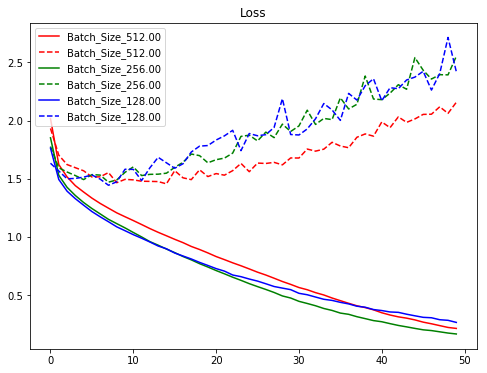

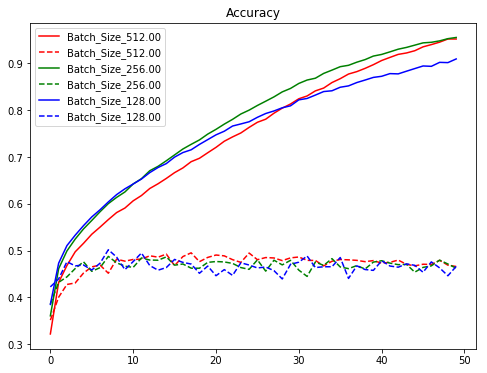

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
def build_mlp2(input_shape, output_units = 10, neurons = [512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(neurons):
        if i == 0 :
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units = n_units,
                                   activation= 'relu',
                                   name = 'hidden_layer' +str(i))(x)
           
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
results2 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for Batch_Size in BATCH_SIZE:
    model = build_mlp2(input_shape = x_train.shape[1:])
    model.summary()

    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)


    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

    model.fit(x_train, y_train,
              epochs = EPOCHS,
              batch_size = Batch_Size,
              validation_data = (x_test, y_test),
              shuffle = True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    name_tag = 'Batch_Size_%.2f' % Batch_Size
    results2[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________

50000/50000 [==============================] - 16s 318us/step - loss: 0.1069 - acc: 0.9879 - val_loss: 2.1039 - val_acc: 0.5047
Epoch 50/50
50000/50000 [==============================] - 14s 277us/step - loss: 0.0993 - acc: 0.9903 - val_loss: 2.1363 - val_acc: 0.5046
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______

50000/50000 [==============================] - 19s 381us/step - loss: 0.0439 - acc: 0.9935 - val_loss: 2.4980 - val_acc: 0.5073
Epoch 48/50
50000/50000 [==============================] - 18s 353us/step - loss: 0.0446 - acc: 0.9930 - val_loss: 2.4906 - val_acc: 0.5082
Epoch 49/50
50000/50000 [==============================] - 18s 359us/step - loss: 0.0352 - acc: 0.9953 - val_loss: 2.5178 - val_acc: 0.5084
Epoch 50/50
50000/50000 [==============================] - 18s 357us/step - loss: 0.0341 - acc: 0.9958 - val_loss: 2.5252 - val_acc: 0.5110
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1

50000/50000 [==============================] - 26s 519us/step - loss: 0.0785 - acc: 0.9759 - val_loss: 2.5341 - val_acc: 0.5220
Epoch 46/50
50000/50000 [==============================] - 26s 528us/step - loss: 0.0716 - acc: 0.9788 - val_loss: 2.5553 - val_acc: 0.5192
Epoch 47/50
50000/50000 [==============================] - 26s 522us/step - loss: 0.0668 - acc: 0.9807 - val_loss: 2.5917 - val_acc: 0.5205
Epoch 48/50
50000/50000 [==============================] - 26s 525us/step - loss: 0.0629 - acc: 0.9819 - val_loss: 2.6290 - val_acc: 0.5209
Epoch 49/50
50000/50000 [==============================] - 28s 564us/step - loss: 0.0592 - acc: 0.9834 - val_loss: 2.5912 - val_acc: 0.5216
Epoch 50/50
50000/50000 [==============================] - 32s 648us/step - loss: 0.0577 - acc: 0.9835 - val_loss: 2.6452 - val_acc: 0.5184


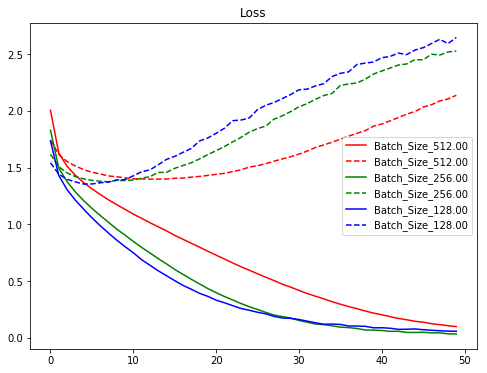

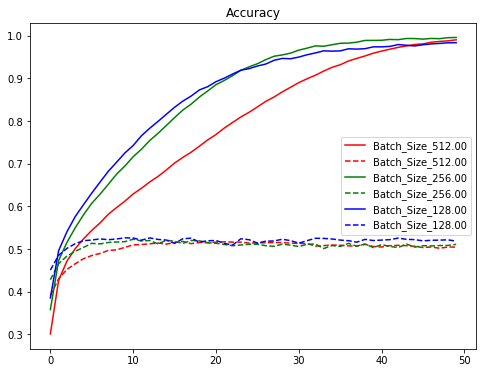

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-loss'])),results2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-loss'])),results2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-acc'])),results2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-acc'])),results2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()